<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Dimensionality-Reduction-Techniques/PCA/PCA_on_multi_class_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
X = pd.DataFrame(wine.data, columns = wine.feature_names)
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [6]:
X.shape

(178, 13)

In [7]:
y = wine.target
y[:2]

array([0, 0])

# Scaled data

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

#feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
!git clone https://github.com/noushadkhan01/my_methods

Cloning into 'my_methods'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 206 (delta 30), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (206/206), 53.91 KiB | 195.00 KiB/s, done.
Resolving deltas: 100% (117/117), done.


In [11]:
%cd my_methods
!ls

/content/my_methods
choose_best_classifier.py	      my_global_variables.py
choose_optimal_number_of_clusters.py  my_roc_curve.py
get_cross_validation.py		      print_model_results.py
my_cap_curve.py			      README.md
my_dummy_variable_2.py		      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from choose_best_classifier import choose_best_classifier
from print_model_results import print_model_results
import my_global_variables
from get_cross_validation import get_cross_validation
from my_cap_curve import my_cap_curve
from visualise_classifier_performance import visualise_classifier_performance

# check for best classifier for this dataset

In [19]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [0]:
import warnings
warnings.filterwarnings(action = 'ignore')

##With scaled

LR: 0.972222 (0.037268)
LDA: 0.961111 (0.035573)
KNN: 0.944444 (0.060858)
DTree: 0.854575 (0.111229)
NB: 0.961111 (0.055833)
SVM: 0.960784 (0.043527)


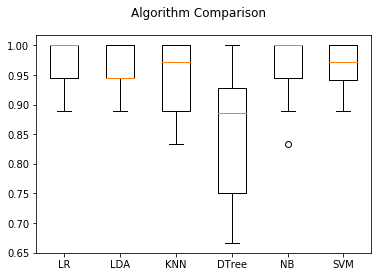

In [23]:
choose_best_classifier(X_scaled, y)

##without scaled

LR: 0.944444 (0.060858)
LDA: 0.961111 (0.035573)
KNN: 0.631046 (0.215931)
DTree: 0.860131 (0.105731)
NB: 0.961111 (0.055833)
SVM: 0.172876 (0.186266)


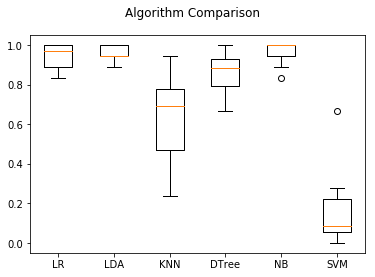

In [25]:
choose_best_classifier(X, y)

# Train model

## logisticRegression without PCA

In [0]:
my_global_variables.init()

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = print_model_results(X_train, X_test, y_train, y_test, model)

 Train score is 0.9929577464788732


Test score is 1.0



Train confusion matrix is 
 [[45  0  0]
 [ 0 54  1]
 [ 0  0 42]]

Test confusion matrix is 
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### cross_validation_score

In [34]:
model = LogisticRegression()
get_cross_validation(X_scaled, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [1.         0.94444444 1.         0.94444444 1.         0.94444444
 1.         1.         1.         1.        ]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.02545875386086579




'Mean for 10 fold cross-validation score:-- 0.9833333333333334'

# PCA

In [0]:
from sklearn.decomposition import PCA

## check variance for all features

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [37]:
import numpy as np
import math
cum_variance = np.cumsum(variance)*100
cum_variance

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

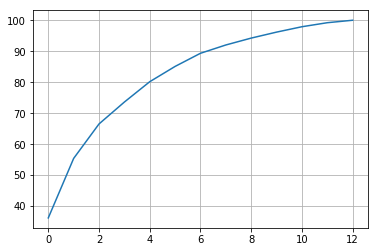

In [40]:
plt.plot(cum_variance)
plt.grid()

**^^As we can see most of the variance is described by 10 features so.. we can select 10 features at all**

### Train model

**scaled X_train, X_test because for pca we need scaled features for better result**

In [41]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = print_model_results(X_train_pca,X_test_pca, y_train, y_test, model)

 Train score is 0.9647887323943662


Test score is 0.9722222222222222



Train confusion matrix is 
 [[43  2  0]
 [ 2 52  1]
 [ 0  0 42]]

Test confusion matrix is 
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]



Test Set classification report is 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



## cross_validation with pca

In [43]:
from sklearn.decomposition import PCA
X_pca = PCA(2).fit_transform(X_scaled)
model = LogisticRegression()
get_cross_validation(X_pca, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.94736842 0.94444444 1.         0.88888889 1.         0.94444444
 0.94444444 1.         0.94117647 1.        ]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.035616014686525255




'Mean for 10 fold cross-validation score:-- 0.9610767113863089'

## for visualisation

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression Classifier 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


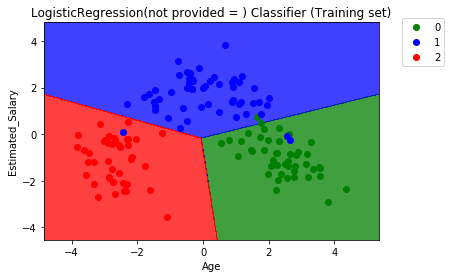

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


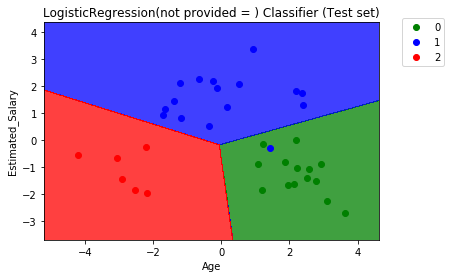

In [53]:
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
visualise_classifier_performance(X_train_pca,X_test_pca, y_train, y_test, model, colors = ('green', 'blue', 'red'))